# Exercício 4
**Nome:** Erick         **Ra.** 240197\
**Nome:** Gabriel       **Ra.** 240254
## Importando depedências

In [2]:
import torch as t
import random
import numpy as np
import matplotlib.pyplot as plt
import json
import tqdm
import Rede_neural as rn
import time as tm
import Treinamenro_de_rede_show as tr

## Definindo os parâmetros de treinamento
 - Estamos utilizando como a média dos quadrados dos desvios obtidos para cada caso de treinamento utilizando a função torch.nn.MSELoss() 
 - O treinamento foi feito em batchs com todos os casos de treinamento
 - O otimizador utilizado foi o Adam
 - Os pesos da rede foram adotados na situação onde a perda dos dados de validação (não extrapolação) é mínima

In [3]:
#função
func = lambda x_1,x_2: x_1 ** 2 + x_2 ** 2 -10*(t.cos(t.pi*x_1) + t.cos(t.pi*x_2))

#amostras 
number_samples = 30
xa, xb = -5, 5
t.manual_seed(0)

input_size = 2
output_size = 1

x_train = xa + (xb-xa) * t.rand(number_samples, input_size)
x_val = xa + (xb-xa) * t.rand(number_samples, input_size)

y_train = func(x_train[:,0], x_train[:,1])
y_val = func(x_val[:,0], x_val[:,1])



## Melhor rede para o problema
Testando para todas as redes que são compostas considerando o número de camadas de até 6 os resultados de um método adpatado do método da secante, se encontrou como melhor rede a rede com a função de ativação RELU  de 6 camadas com respectivamente 10, 52, 19, 71, 44 e 58 nerrônios por camada. O melhor resultado para as redes com funções de ativação Sigmoid foi com dadas 2 camadas com respectivamente 18 e 4 reunônios dispostos. já para a função de ativação to tipo tanh o melhor resdultado foi obserdo com 6 camadas das quais foram dispostos 95, 168, 177, 47, 79, e 994 neurônios em cada uma delas.  
### Rede RELU com 6 camadas e uma distribuição de neurînios por camada: 10 na 1ª, 52 na 2ª, 19 na 3ª, 71 na 4ª, 44 na 5ª, 58 na 6ª (Melhor)

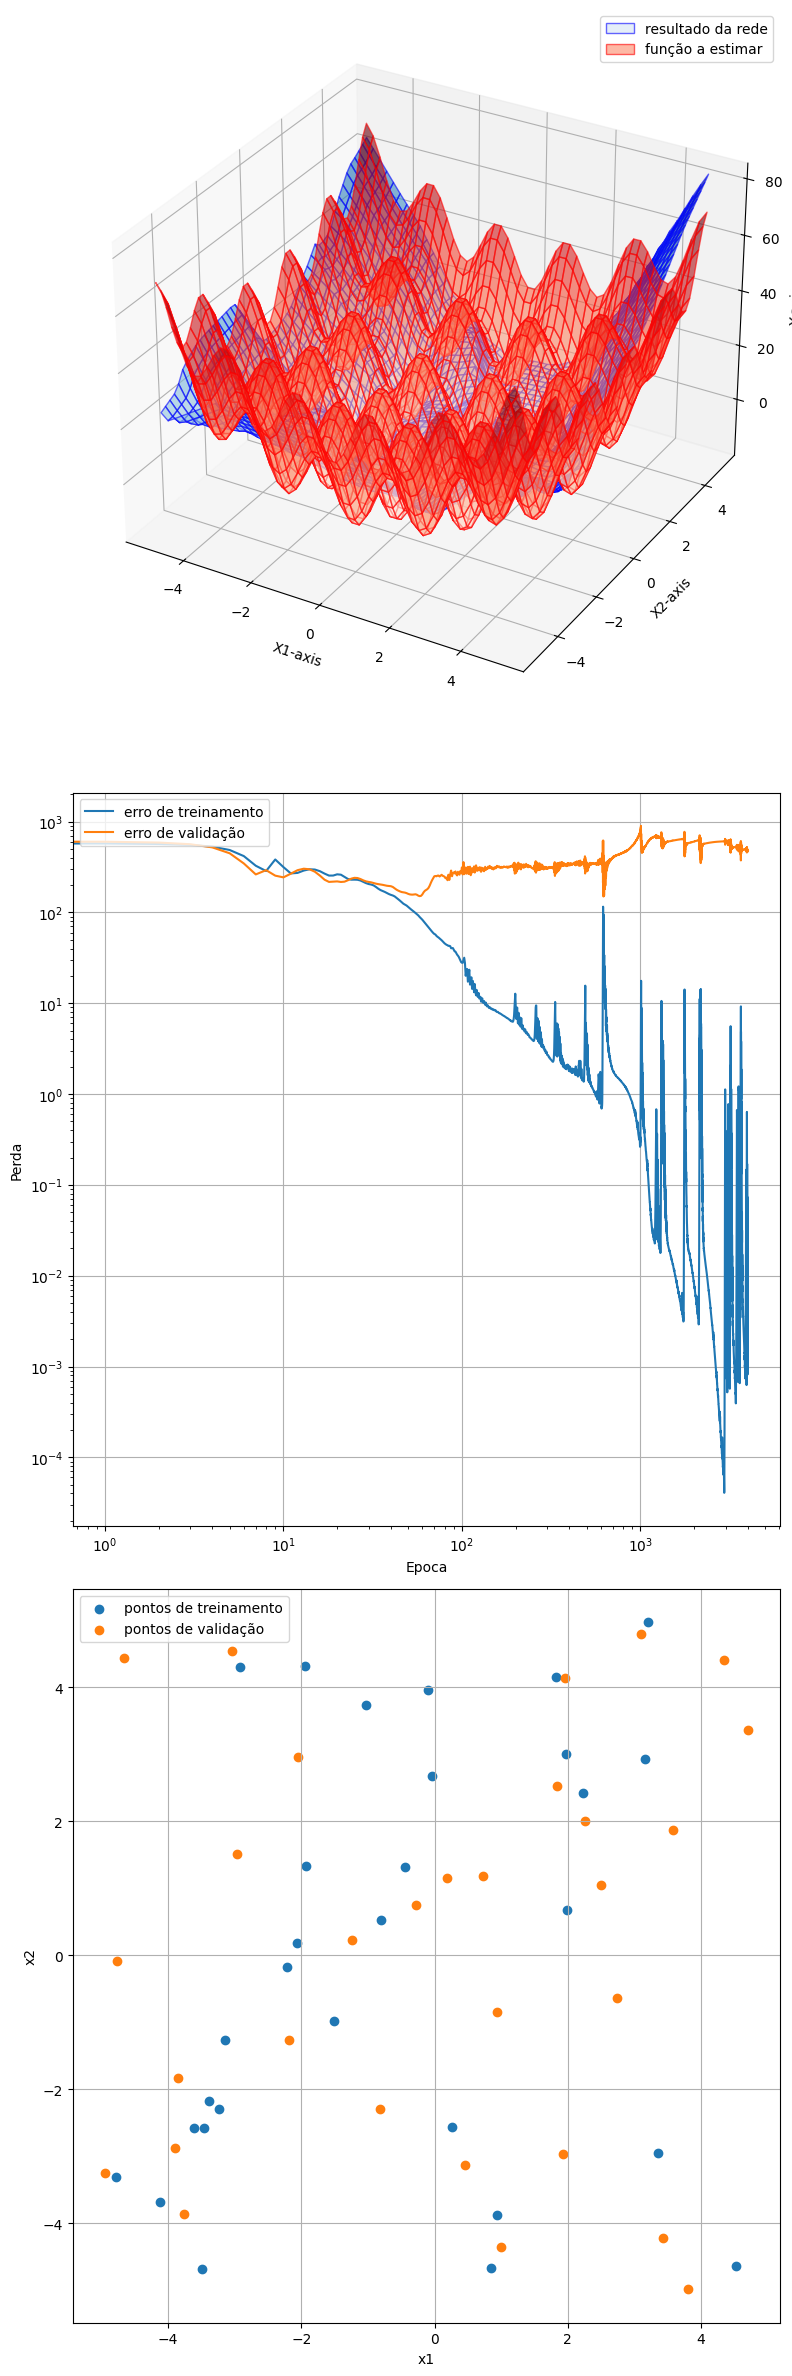

perda estimada = 149.78854370117188


In [4]:
# função de ativação
activation_func = "ReLU"

# número de neuronios
neuronios = [10, 52, 19, 71, 44, 58]

# processamento da rede e plotagem das funções
loss_val_min = tr.processamento_agrupado_2d(rn.neural_net_interno_6_hidden, neuronios, activation_func, x_train, y_train, x_val, y_val, func, xa, xb)

# printando preda mínima dos dados de validação
print(f"perda estimada = {loss_val_min}")

### Rede Sigmoid com 2 camdas com a configuração de 18 neurônios na 1ª e 4 na 2ª ( melhor)

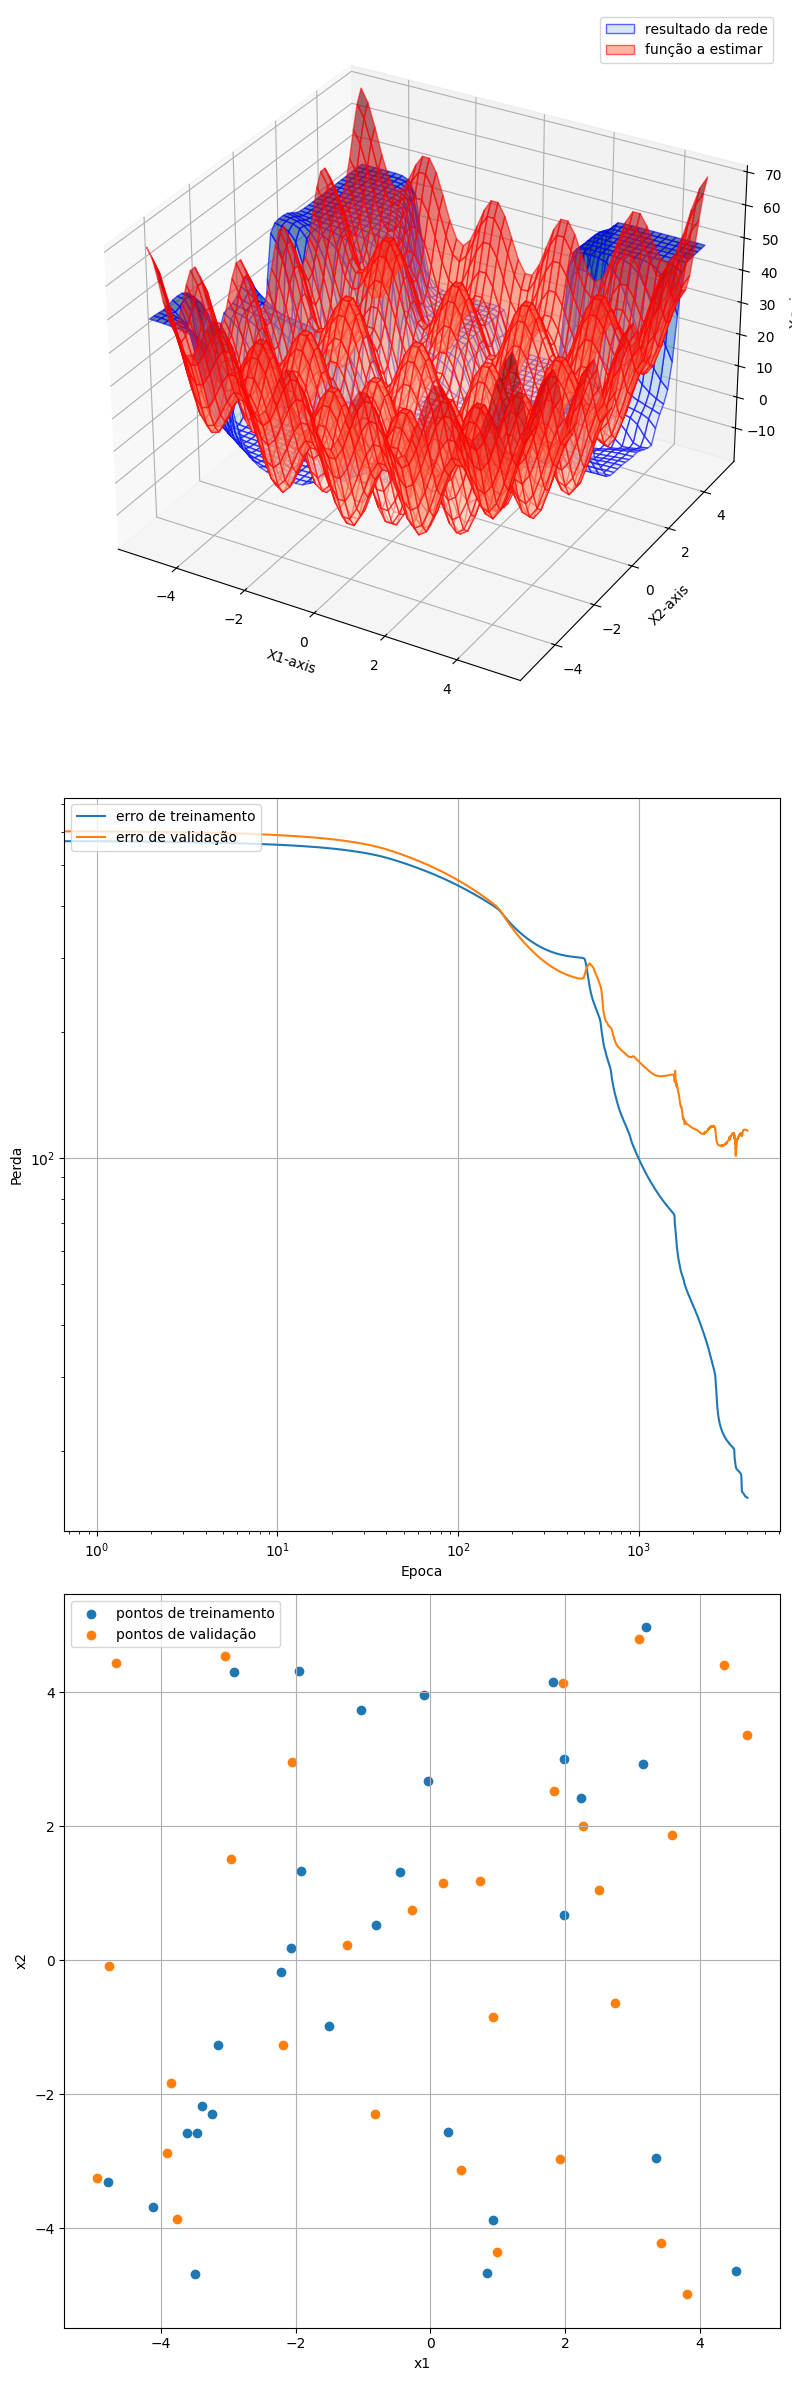

perda estimada = 101.1700439453125


In [5]:
# função de ativação
activation_func = "sigmoid"

# número de neuronios
neuronios = [18,4]

# processamento da rede e plotagem das funções
loss_val_min = tr.processamento_agrupado_2d(rn.neural_net_interno_2_hidden, neuronios, activation_func, x_train, y_train, x_val, y_val, func, xa, xb)

# printando preda mínima dos dados de validação
print(f"perda estimada = {loss_val_min}")

### Rede Tanh com  6 camadas das quais foram distribuidos 95 na 1ª, 168 na 2ª, 177 na 3ª, 47 na 4ª, 79 5ª e 994 na 6ª ( melhor)

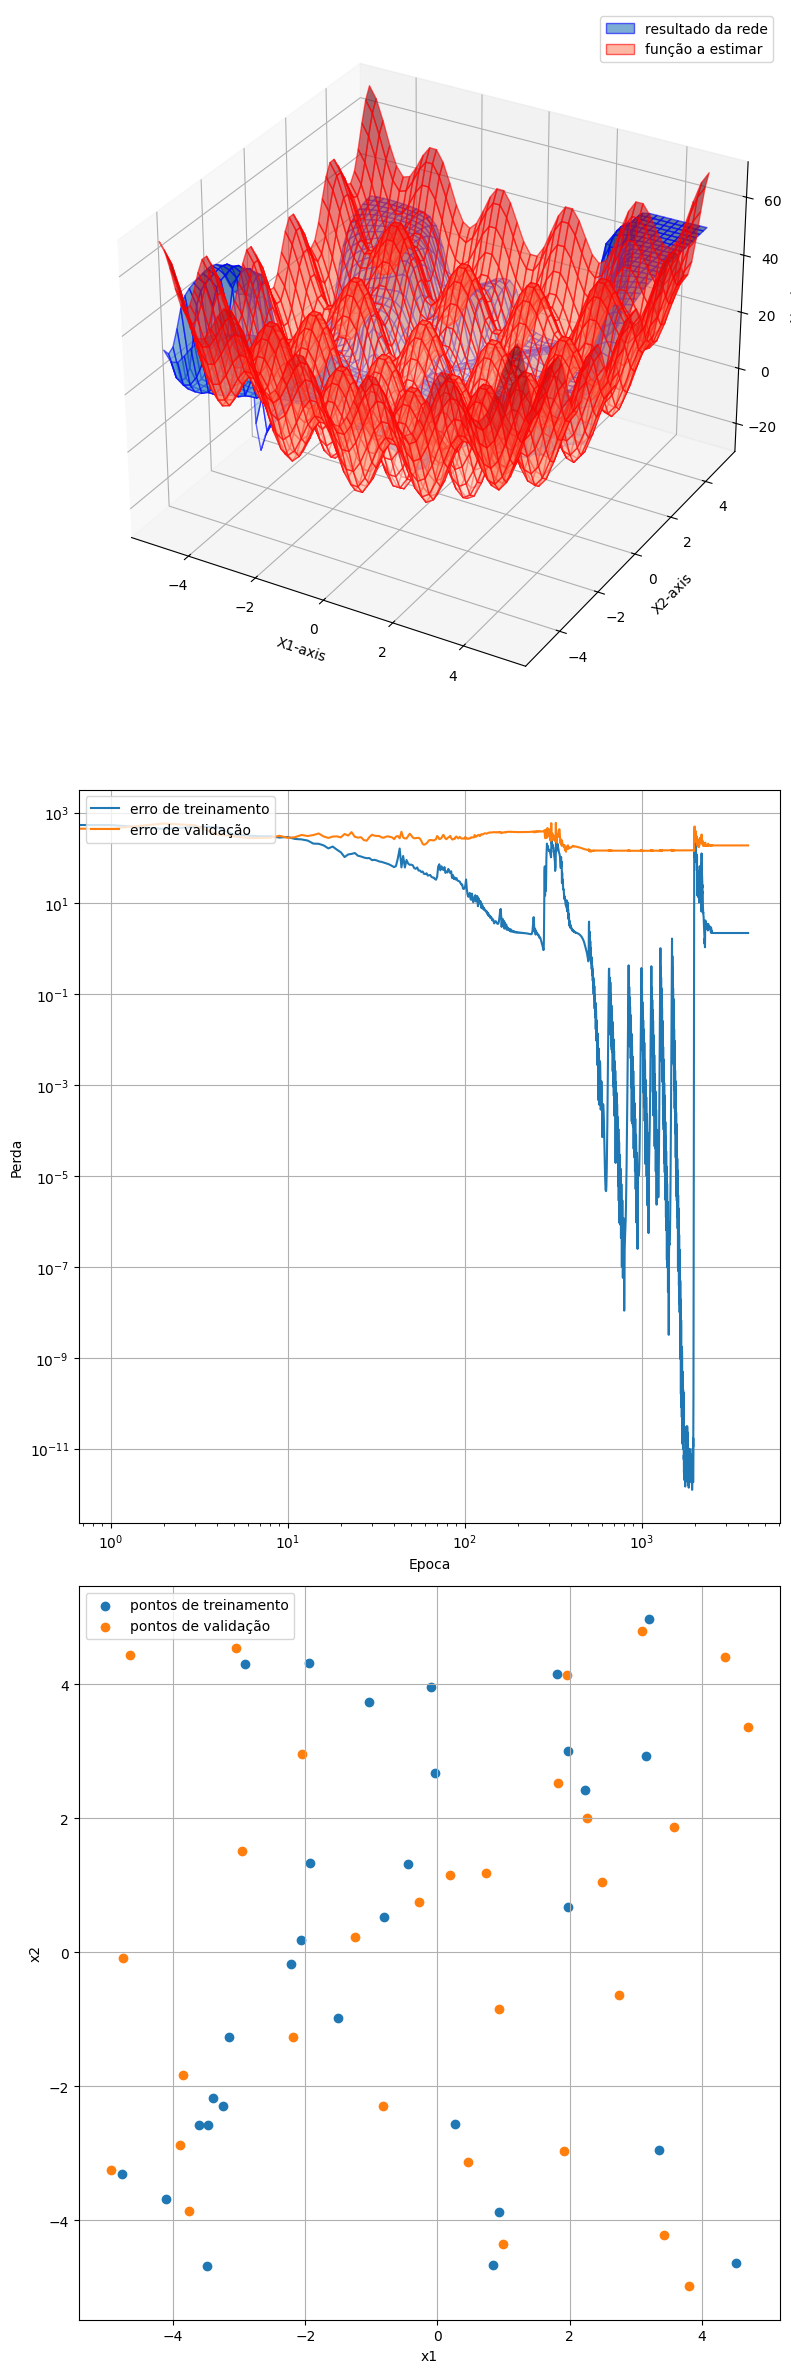

perda estimada = 137.37538146972656


In [6]:
# função de ativação
activation_func = "tanh"

# número de neuronios
neuronios = [95, 168, 177, 47, 79, 994]

# processamento da rede e plotagem das funções
loss_val_min = tr.processamento_agrupado_2d(rn.neural_net_interno_6_hidden, neuronios, activation_func, x_train, y_train, x_val, y_val, func, xa, xb)

# printando preda mínima dos dados de validação
print(f"perda estimada = {loss_val_min}")